In [73]:
import numpy as np
from sklearn import linear_model 
from sklearn.datasets import make_regression 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation

More complicated landscapes
 
 https://en.wikipedia.org/wiki/Test_functions_for_optimization

# Functions

In [74]:
#--------------------------------#
# FUNCTIONS AND THEIR DERIVATIVES

# BOWL

def bowl(x,y):
    
    z = x**2 + y**2
    
    return z

def bowl_der(x,y):
        
    # Partial derivatives
    dx  = 2*x
    dy  = 2*y
    
    return dx, dy

# SADDLE

def saddle(x,y):
    
    z = x**2 - y**2
    
    return z

def saddle_der(x,y):
        
    # Partial derivatives
    dx  = 2*x
    dy  = -2*y
    
    return dx, dy

# CAMEL

def camel(x,y):
    
    term1 = (4-2.1*x**2+(x**4)/3)*x**2
    term2 = x*y
    term3 = (-4+4*y**2)*y**2
    z = term1 + term2 + term3
    
    return z

def camel_der(x,y):

    # Partial derivatives

    dt1_x = 8*x - 8.4*x**3 + 2*x**5
    dt2_x = y
    dt3_x = 0

    dx = dt1_x + dt2_x + dt3_x

    dt1_y = 0
    dt2_y = x
    dt3_y = -8*y + 16*y**3

    dy = dt1_y + dt2_y + dt3_y
    
    return dx, dy

# Optimizers

In [75]:
# OPTIMIZERS

def plain_gd(x,y,func,lrate,epoches):
    
    history = []
    for epoch in range(epoches):
        
        history.append([x,y])
        dx, dy = func(x,y)

        x   = x - lrate* dx        
        y   = y - lrate* dy         
        
    history = np.asarray(history)       
    return history  

def sgmoment(x,y,func,lrate,epoches,params):
    
    beta = params
    vx, vy = 0, 0
    
    history = []
    for epoch in range(epoches):
        
        history.append([x,y])
        dx, dy = func(x,y)  

        vx = beta*vx + (1-beta)*dx  
        vy = beta*vy + (1-beta)*dy

        x   = x - lrate*vx   
        y   = y - lrate*vy  

    history = np.asarray(history)      
    return history

def rmsprop(x,y,func,lrate,epoches,params):

    beta, eps = params
    vx, vy = 0, 0
    
    history = []
    for epoch in range(epoches):
        
        history.append([x,y])   
        dx, dy = func(x,y)    

        vx = beta*vx + (1-beta)*dx**2   
        vy = beta*vy + (1-beta)*dy**2 

        x   = x - (lrate/(np.sqrt(vx)+eps))* dx         
        y   = y - (lrate/(np.sqrt(vy)+eps))* dy          
    
    history = np.asarray(history)
    return history

def adam(x,y,func,lrate,epoches,params):
    
    beta1, beta2, eps = params
    vx, vy, sx, sy = 0, 0, 0, 0
    
    history = []
    for epoch in range(epoches):
        
        history.append([x,y])           
        dx, dy = func(x,y)    

        # "momentum" update with beta1
        vx = beta1*vx + (1-beta1)*dx
        vy = beta1*vy + (1-beta1)*dy
        # "rmsprop" update with beta2
        sx = beta2*sx + (1-beta2)*dx**2   
        sy = beta2*sy + (1-beta2)*dy**2
        
        # bias correction 
        vx = vx/(1-beta1**(epoch+1))
        vy = vy/(1-beta1**(epoch+1))
        
        sx = sx/(1-beta2**(epoch+1))
        sy = sy/(1-beta2**(epoch+1))

        x   = x - lrate*vx/(np.sqrt(sx)+eps)         
        y   = y - lrate*vy/(np.sqrt(sy)+eps)   
        
    
    history = np.asarray(history)
    return history

# Optimization

In [76]:
# initial weights
x, y    = -1.5, 0.25
lrate   = 0.01
epoches = 500

history_bowl1       = plain_gd(x,y,bowl_der,lrate,epoches)
history_bowl2       = sgmoment(x,y,bowl_der,lrate,epoches,0.9)
history_bowl3       = rmsprop(x,y,bowl_der,lrate,epoches,(0.9,10e-8))
history_bowl4       = adam(x,y,bowl_der,lrate,epoches,(0.9,0.95,10e-8))

###  Plotting Bowl

(-2, 6)

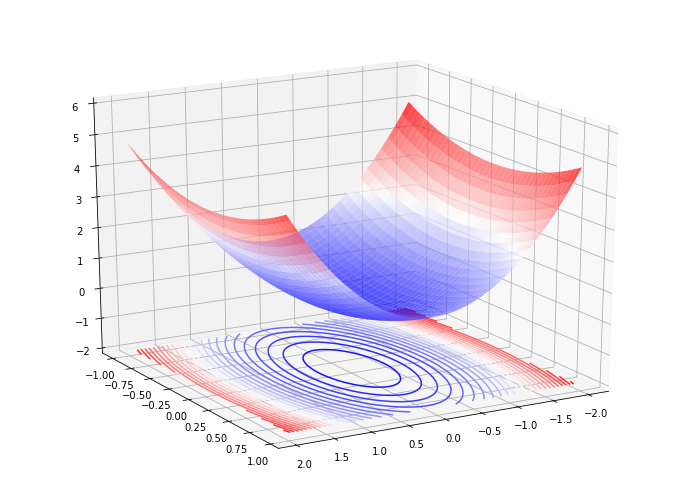

In [77]:
x = np.arange(-2, 2, 0.05)
y = np.arange(-1, 1, 0.05)

# plot surface
X, Y = np.meshgrid(x,y)
Z = bowl(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr)
ax1.contour(X,Y,Z, 30, zdir='z', offset=-2, cmap=cm.bwr)
ax1.view_init(20, 60)
ax1.set_zlim(-2, 6)

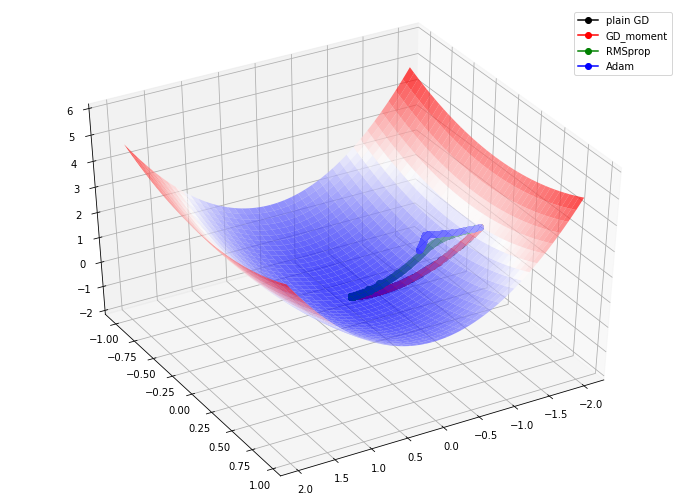

In [78]:
# plot optimization process 3D
history = [history_bowl1, history_bowl2, history_bowl3, history_bowl4]
labels = ['plain GD','GD_moment','RMSprop','Adam']
colors = ['ok-','or-','og-','ob-']

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')

for i in range(len(history)):
    x_scatter = history[i][:,0]
    y_scatter = history[i][:,1]
    z_scatter = bowl(x_scatter, y_scatter)
    
    ax1.plot(x_scatter,y_scatter,z_scatter,colors[i],label=labels[i])

ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr,zorder=2)
ax1.view_init(40, 60)
ax1.set_zlim(-2, 6)

plt.legend()
plt.show()

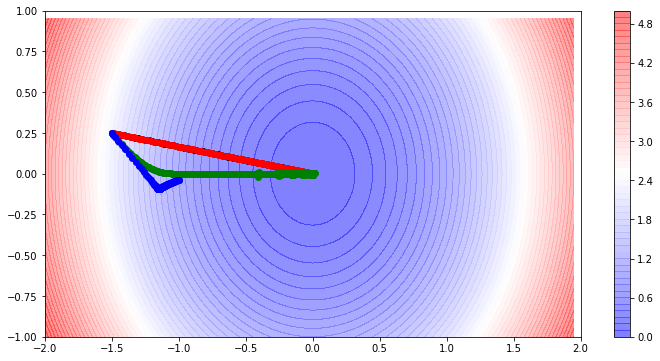

In [79]:
# plot optimization process 2D
fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])

for i in range(len(history)):
    x_scatter = history[i][:,0]
    y_scatter = history[i][:,1]
    z_scatter = bowl(x_scatter, y_scatter)
    
    ax1.plot(x_scatter,y_scatter,colors[i],label=labels[i])

ctr = ax1.contourf(X,Y,Z, 50, cmap=cm.bwr, alpha=0.5)

plt.ylim((-1,1))
plt.xlim((-2,2))

fig.colorbar(ctr)
plt.show()

In [114]:
# initial weights
x, y    = -10, 0.001
lrate   = 0.1
epoches = 500

history_saddle1       = plain_gd(x,y,saddle_der,lrate,epoches)
history_saddle2       = sgmoment(x,y,saddle_der,lrate,epoches,0.9)
history_saddle3       = rmsprop(x,y,saddle_der,lrate,epoches,(0.9,10e-8))
history_saddle4       = adam(x,y,saddle_der,lrate,epoches,(0.9,0.93,10e-8))

###  Plotting Saddle

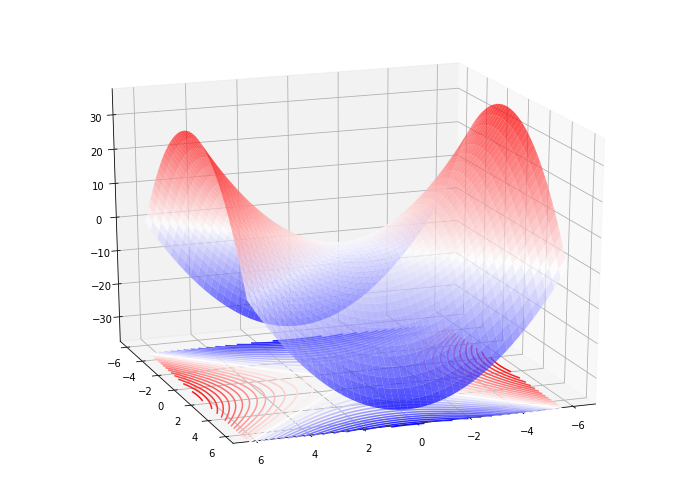

In [106]:
x = np.arange(-6, 6, 0.05)
y = np.arange(-6, 6, 0.05)

# plot surface
X, Y = np.meshgrid(x,y)
Z = saddle(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr)
ax1.contour(X,Y,Z, 30, zdir='z', offset=-40, cmap=cm.bwr)
ax1.view_init(20, 70)
# ax1.set_zlim(-2, 6)

plt.show()

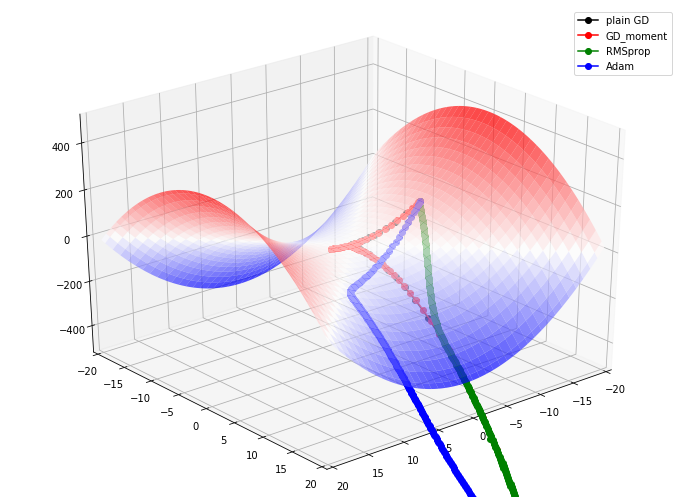

In [115]:
x = np.arange(-20, 20, 0.5)
y = np.arange(-20, 20, 0.5)

# plot surface
X, Y = np.meshgrid(x,y)
Z = saddle(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

# plot optimization process 3D
history = [history_saddle1, history_saddle2, history_saddle3, history_saddle4]
labels = ['plain GD','GD_moment','RMSprop','Adam']
colors = ['ok-','or-','og-','ob-']

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')

for i in range(len(history)):
    x_scatter = history[i][:,0]
    y_scatter = history[i][:,1]
    z_scatter = saddle(x_scatter, y_scatter)
    
    ax1.plot(x_scatter,y_scatter,z_scatter,colors[i],label=labels[i])

ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr,zorder=2)

ax1.view_init(30, 50)
ax1.set_zlim(-500, 500)
ax1.set_ylim(-20, 20)
ax1.set_xlim(-20, 20)

plt.legend()
plt.show()

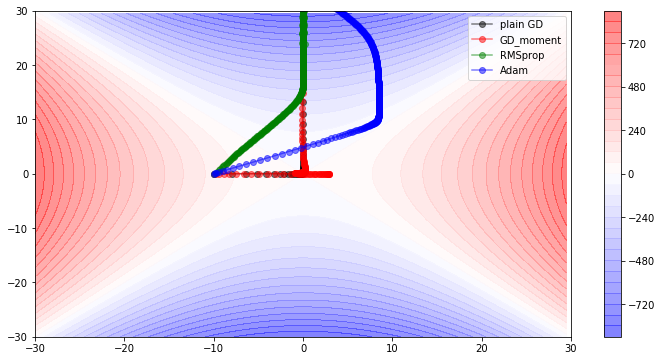

In [116]:
x = np.arange(-30, 30, 0.5)
y = np.arange(-30, 30, 0.5)

# plot surface
X, Y = np.meshgrid(x,y)
Z = saddle(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])

for i in range(len(history)):
    x_scatter = history[i][:,0]
    y_scatter = history[i][:,1]
    
    ax1.plot(x_scatter,y_scatter,colors[i],label=labels[i], alpha=0.5)

ctr = ax1.contourf(X,Y,Z, 30, cmap=cm.bwr, alpha=0.5)

plt.ylim((-30,30))
plt.xlim((-30,30))

fig.colorbar(ctr)
plt.legend()
plt.show()

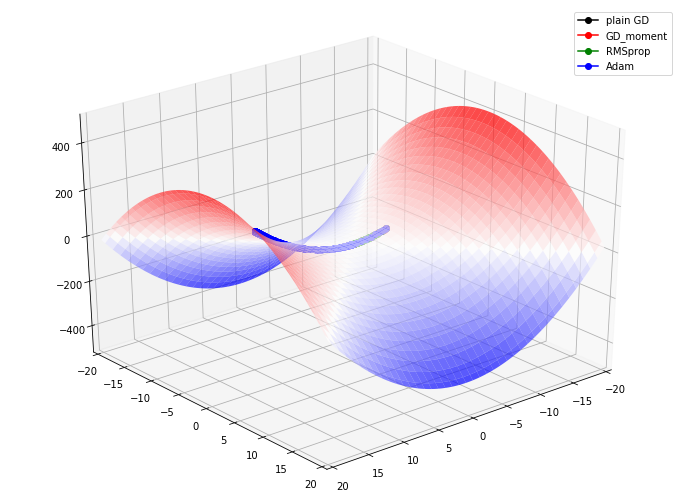

In [119]:
# CASE WHEN NONE OF THE OPTIMIZERS CAN ESCAPE THE SADDLE POINT???? (y=0)
# initial weights 
x, y    = -5, 0
lrate   = 0.1
epoches = 500

history_saddle11       = plain_gd(x,y,saddle_der,lrate,epoches)
history_saddle21       = sgmoment(x,y,saddle_der,lrate,epoches,0.9)
history_saddle31       = rmsprop(x,y,saddle_der,lrate,epoches,(0.9,10e-8))
history_saddle41       = adam(x,y,saddle_der,lrate,epoches,(0.9,0.93,10e-8))

x = np.arange(-20, 20, 0.5)
y = np.arange(-20, 20, 0.5)

# plot surface
X, Y = np.meshgrid(x,y)
Z = saddle(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

# plot optimization process 3D
history = [history_saddle11, history_saddle21, history_saddle31, history_saddle41]
labels = ['plain GD','GD_moment','RMSprop','Adam']
colors = ['ok-','or-','og-','ob-']

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')

for i in range(len(history)):
    x_scatter = history[i][:,0]
    y_scatter = history[i][:,1]
    z_scatter = saddle(x_scatter, y_scatter)
    
    ax1.plot(x_scatter,y_scatter,z_scatter,colors[i],label=labels[i])

ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr,zorder=2)

ax1.view_init(30, 50)
ax1.set_zlim(-500, 500)
ax1.set_ylim(-20, 20)
ax1.set_xlim(-20, 20)

plt.legend()
plt.show()

In [128]:
x, y    = -1.3, -1
lrate   = 0.05
epoches = 500

history_camel1       = plain_gd(x,y,camel_der,lrate,epoches)
history_camel2       = sgmoment(x,y,camel_der,lrate,epoches,0.95)
history_camel3       = rmsprop(x,y,camel_der,lrate,epoches,(0.9,10e-8))
history_camel4       = adam(x,y,camel_der,lrate,epoches,(0.9,0.95,10e-8))

###  Plotting Camel

(-2, 6)

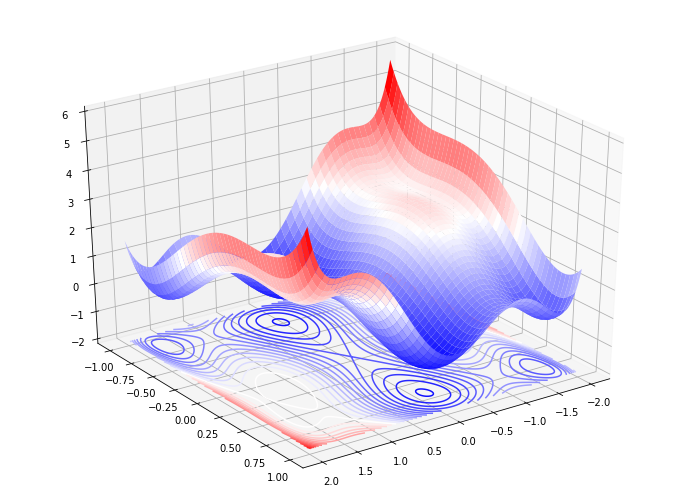

In [133]:
x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)

# plot surface
X, Y = np.meshgrid(x,y)
Z = camel(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')
ax1.plot_surface(X,Y,Z, alpha=1,cmap=cm.bwr)
ax1.contour(X,Y,Z, 30, zdir='z', offset=-2, cmap=cm.bwr)
ax1.view_init(30, 55)
ax1.set_zlim(-2, 6)

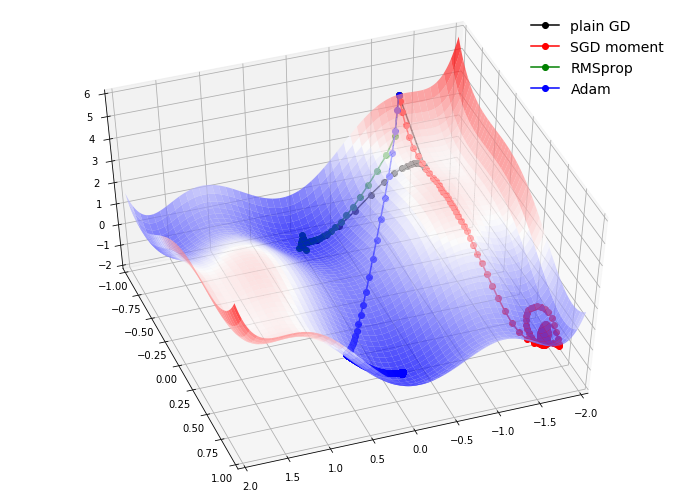

In [163]:
# plot optimization process 3D
history_camel = [history_camel1, history_camel2, history_camel3, history_camel4]
labels = ['plain GD','SGD moment','RMSprop','Adam']
colors = ['ok-','or-','og-','ob-']

fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')

for i in range(len(history_camel)):
    x_scatter = history_camel[i][:,0]
    y_scatter = history_camel[i][:,1]
    z_scatter = camel(x_scatter, y_scatter)
    
    ax1.plot(x_scatter,y_scatter,z_scatter,colors[i],label=labels[i])

ax1.plot_surface(X,Y,Z, alpha=0.7,cmap=cm.bwr,zorder=2)
ax1.view_init(50, 70)

ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-2, 6)

plt.legend(fontsize=14, frameon=False)
plt.show()

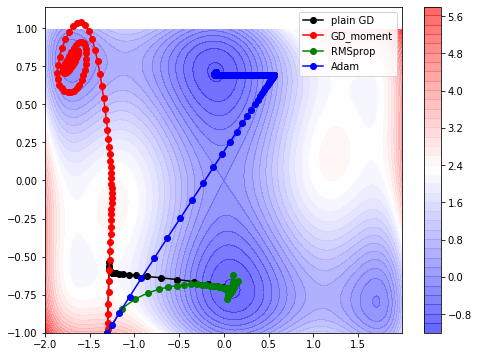

In [142]:
# plot surface
X, Y = np.meshgrid(x,y)
Z = camel(X.ravel(), Y.ravel())
Z = Z.reshape(X.shape[0],-1)

fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])

for i in range(len(history_camel)):
    x_scatter = history_camel[i][:,0]
    y_scatter = history_camel[i][:,1]
    
    ax1.plot(x_scatter,y_scatter,colors[i],label=labels[i])

ctr = ax1.contourf(X,Y,Z, 40, cmap=cm.bwr, alpha=0.6)

fig.colorbar(ctr)
plt.legend()
plt.show()

### ANIMATION 3D CAMEL

/home/shamsi/anaconda3/envs/snowflake/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/shamsi/anaconda3/envs/snowflake/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


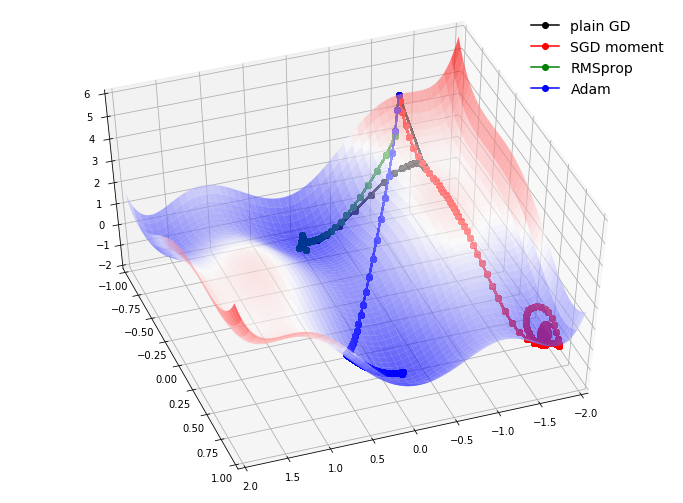

In [164]:
fig = plt.figure(figsize=(12,9))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0], projection='3d')

for i in range(len(history_camel)):
    x_scatter = history_camel[i][0,0]
    y_scatter = history_camel[i][0,1]
    z_scatter = camel(x_scatter, y_scatter)
    
    ax1.plot([x_scatter],[y_scatter],[z_scatter],colors[i],label=labels[i])

ax1.plot_surface(X,Y,Z, alpha=0.6,cmap=cm.bwr,zorder=2)
ax1.view_init(50, 70)

ax1.set_xlim(-2, 2)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-2, 6)

plt.legend(fontsize=14, frameon=False)

# animation function.  This is called sequentially
def animate(i): 
    
    for j in range(len(history_camel)):
        x_scatter = history_camel[j][:i,0]
        y_scatter = history_camel[j][:i,1]
        z_scatter = camel(x_scatter, y_scatter)

        ax1.plot(x_scatter,y_scatter,z_scatter,colors[j],label=labels[j])  
  
    return ax1


# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=500, interval=10)

anim.save('camel3D.mp4', fps=15)
plt.show()

### ANIMATION 2D CAMEL

/home/shamsi/anaconda3/envs/snowflake/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/shamsi/anaconda3/envs/snowflake/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


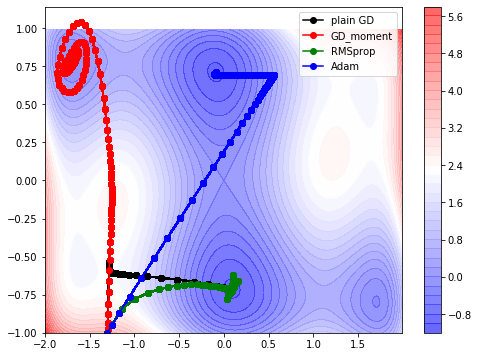

In [143]:
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(gs[0, 0])

for i in range(len(history_camel)):
    x_scatter = history_camel[i][0,0]
    y_scatter = history_camel[i][0,1]
    
    ax1.plot([x_scatter],[y_scatter],colors[i],label=labels[i])

ctr = ax1.contourf(X,Y,Z, 40, cmap=cm.bwr, alpha=0.6)

fig.colorbar(ctr)
plt.legend()

# animation function.  This is called sequentially
def animate(i): 
    
    for j in range(len(history_camel)):
        x_scatter = history_camel[j][:i,0]
        y_scatter = history_camel[j][:i,1]

        ax1.plot(x_scatter,y_scatter,colors[j],label=labels[j])      
  
    return ax1

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=500, interval=10)

anim.save('camel2D_2.mp4', fps=10)
plt.show()